<a href="https://www.kaggle.com/code/ajiboyetoluwalase/eda-on-wordpress-ddos-attack-log?scriptVersionId=127524240" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wordpress-ddos-log-dataset/Wordpress DDOS attack Logs.txt
/kaggle/input/wordpress-ddos-log-dataset/wordpress_ddos_log_transform.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('/kaggle/input/wordpress-ddos-log-dataset/wordpress_ddos_log_transform.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         569 non-null    int64 
 1   IP adress          569 non-null    object
 2   Port               569 non-null    object
 3   Wordpress Version  569 non-null    object
 4   Website            563 non-null    object
 5   DT                 569 non-null    object
 6   Time               569 non-null    object
dtypes: int64(1), object(6)
memory usage: 31.2+ KB


In [4]:
IP = df['IP adress'].value_counts()>=4
print(IP.sum())
print(IP[:13])

13
94.136.40.100      True
82.165.139.53      True
184.168.152.79     True
193.202.110.182    True
66.96.183.86       True
66.96.183.2        True
81.19.187.39       True
64.111.127.183     True
66.249.24.247      True
184.173.73.183     True
80.82.113.174      True
91.184.18.50       True
50.56.33.56        True
Name: IP adress, dtype: bool


- This are the IP addresses that contacted the server four times or more than four times
- They are about 13 in total and listed above 

In [5]:
web = df['Website'].value_counts()>=4
print(web.sum())
print(web[:11])

11
http://chakra-project.es                            True
http://www.isledejeancharles.com/news               True
http://danhamilton.co.uk/blog                       True
http://salaanmedia.com                              True
http://www.foamcasualty.com                         True
http://27blueballoons.com                           True
http://sociedia.com                                 True
http://www.davidcoxon.com/run                       True
http://www.womensrightswithoutfrontiers.org/blog    True
http://rotoprofessor.com/football                   True
http://50.56.33.56/blog                             True
Name: Website, dtype: bool


- This are the Websites that contacted the server four times or more than four times
- They are about 11 in total and listed above 

<AxesSubplot:>

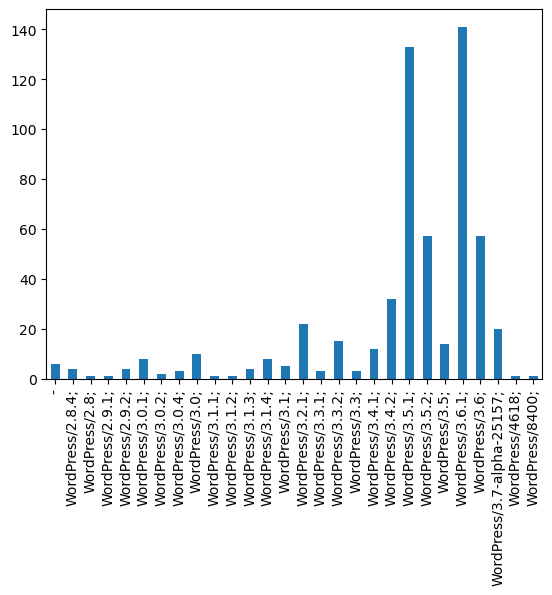

In [6]:
df['Wordpress Version'].value_counts().sort_index().plot(kind ='bar')

- This is graph of the wordpress versions frequency
- highest used version is Wordpress/3.6.1

<AxesSubplot:>

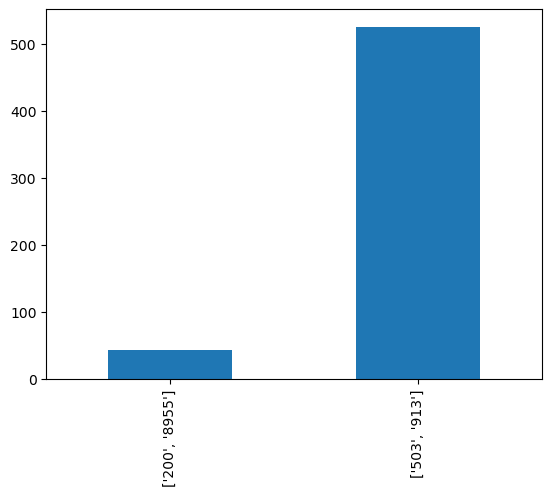

In [7]:
df['Port'].value_counts().sort_index().plot(kind ='bar')

- This is a graph of the attacking port to the good requests

In [8]:
df['Port'].value_counts().sort_index()

['200', '8955']     43
['503', '913']     526
Name: Port, dtype: int64

- the attacking port ([503,913]) contacted the server 526 times changing ip adresses 

## Conclusion

#### Timing
- The attack began at 13:03:01
- it Ended at 13:03:13

#### Means
- The attacker used the [503,913] port/request changing the ip adress contacting the server up to 526 times within that timeframe 
- The attacker mostly used wordpress/3.6.1 and wordpress/3.5.1

- This is what i have been able to highlight about this ddos attack
- Pls Correct me if i have made any mistakes or if there was a better way of going around it